**Topic Modeling:**

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents.

**LDA**

Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. Modeled as Dirichlet distributions are
- a topic per document model -> a documents consists of multiple words each with a topic distribution
- words per topic model -> every topic is closer to a group of words



In [ ]:
# Eg: 
# doc1 = ['Tree has fruits']
# doc2 = ['abc party was elected']

Latent: This refers to everything that we don’t know a priori and are hidden in the data. Here, the themes or topics that document consists of are unknown, but they are believed to be present as the text is generated based on those topics.

Dirichlet: It is a ‘distribution of distributions’.

Allocation: This means that once we have Dirichlet, we will allocate topics to the documents and words of the document to topics.

1. ϴtd = P(t|d) which is the probability distribution of topics in documents
2. Фwt = P(w|t) which is the probability distribution of words in topics
And, we can say that the probability of a word given document i.e. P(w|d) is equal to:

### p(w|d) = Σ(p(w|d,t)*p(d/t)) 

sum for all t in T, where T is the total number of topics. Also, let’s assume that there is W number of words in our vocabulary for all the documents.
If we assume conditional independence, we can say that
P(w|t,d) = P(w|t)
And hence P(w|d) is equal to:

that is the dot product of ϴtd and Фwt for each topic t.

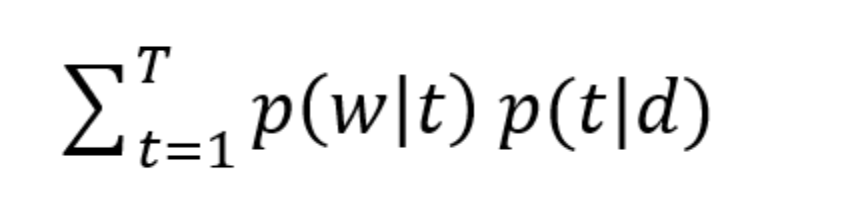

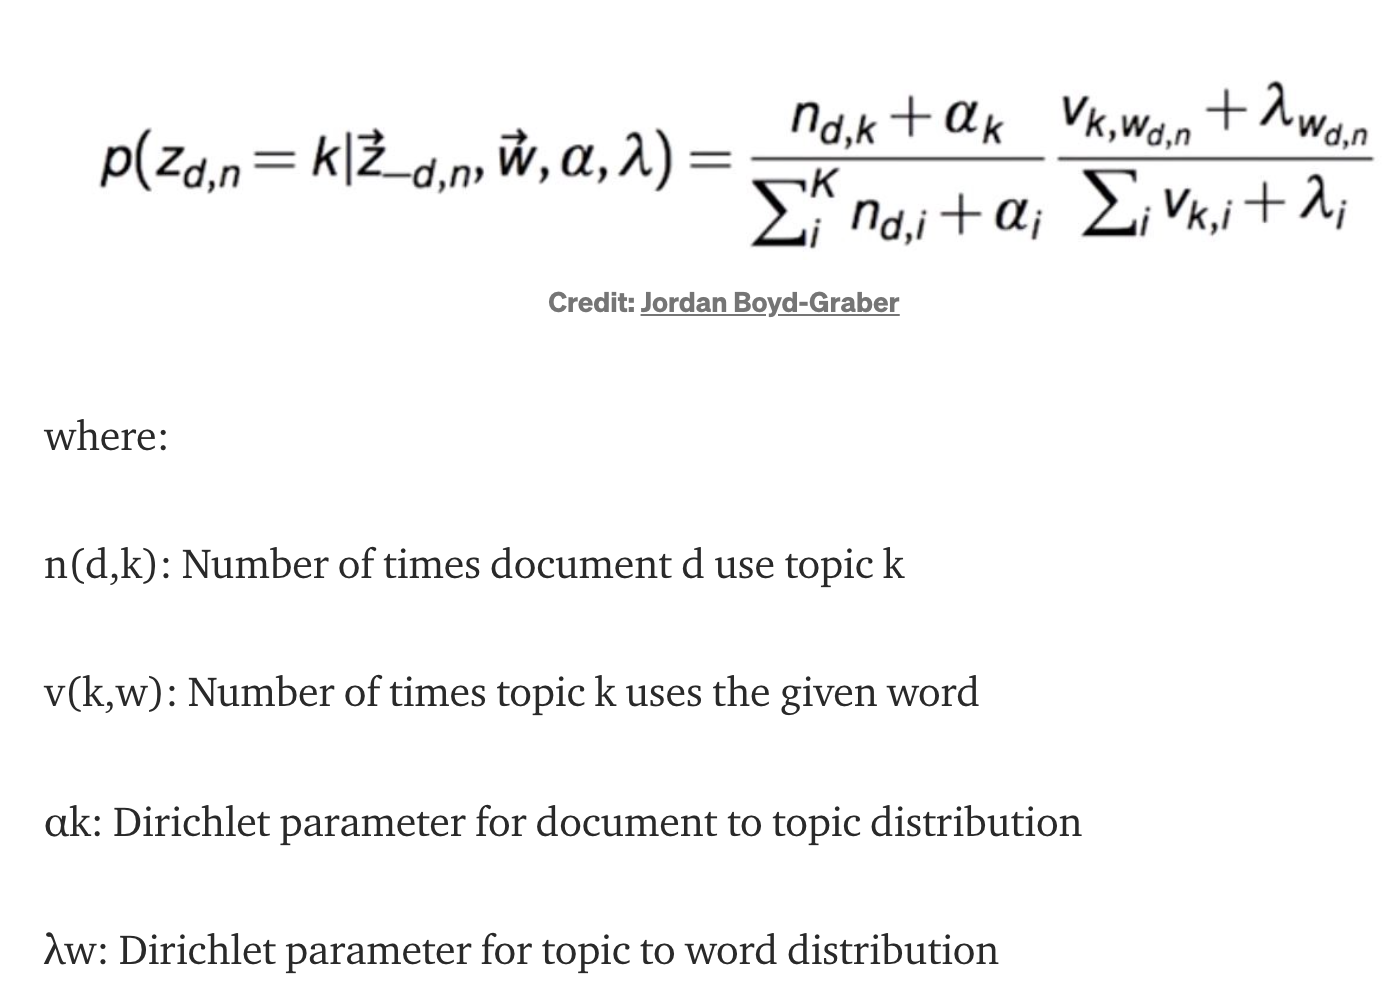

**Gibbs Sampling** 
Gibbs sampling is an algorithm for successively sampling conditional distributions of variables, whose distribution over states converges to the true distribution in the long run. This is somewhat an abstract concept and needs a good understanding of Monte Carlo Markov Chains and Bayes theorem.

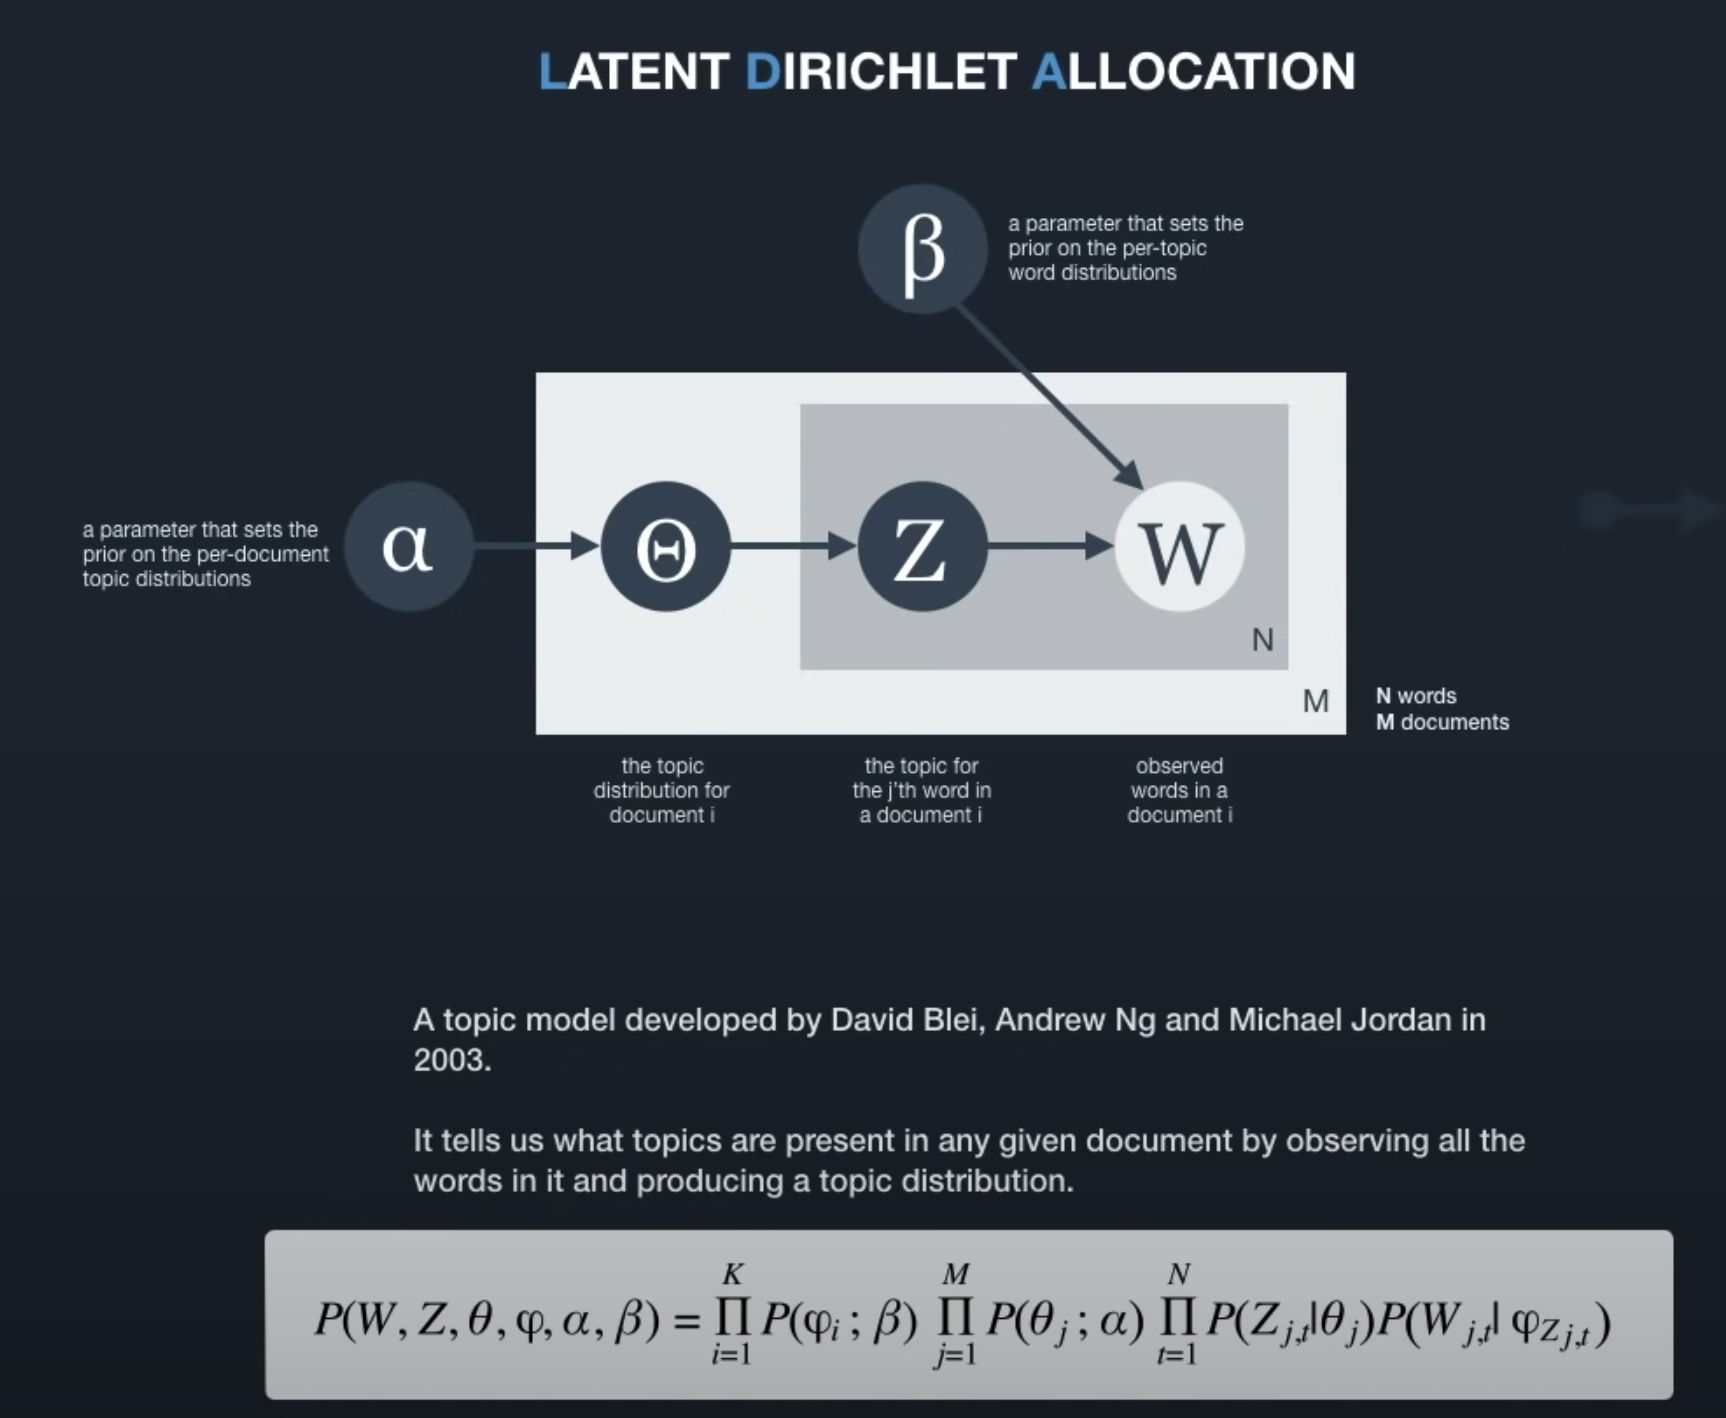

Therefore, what we are doing is we are trying to maximize the likelihood of our data given these two distributions

We do not have to worry about most of the mathematics as that is handled by gensim.

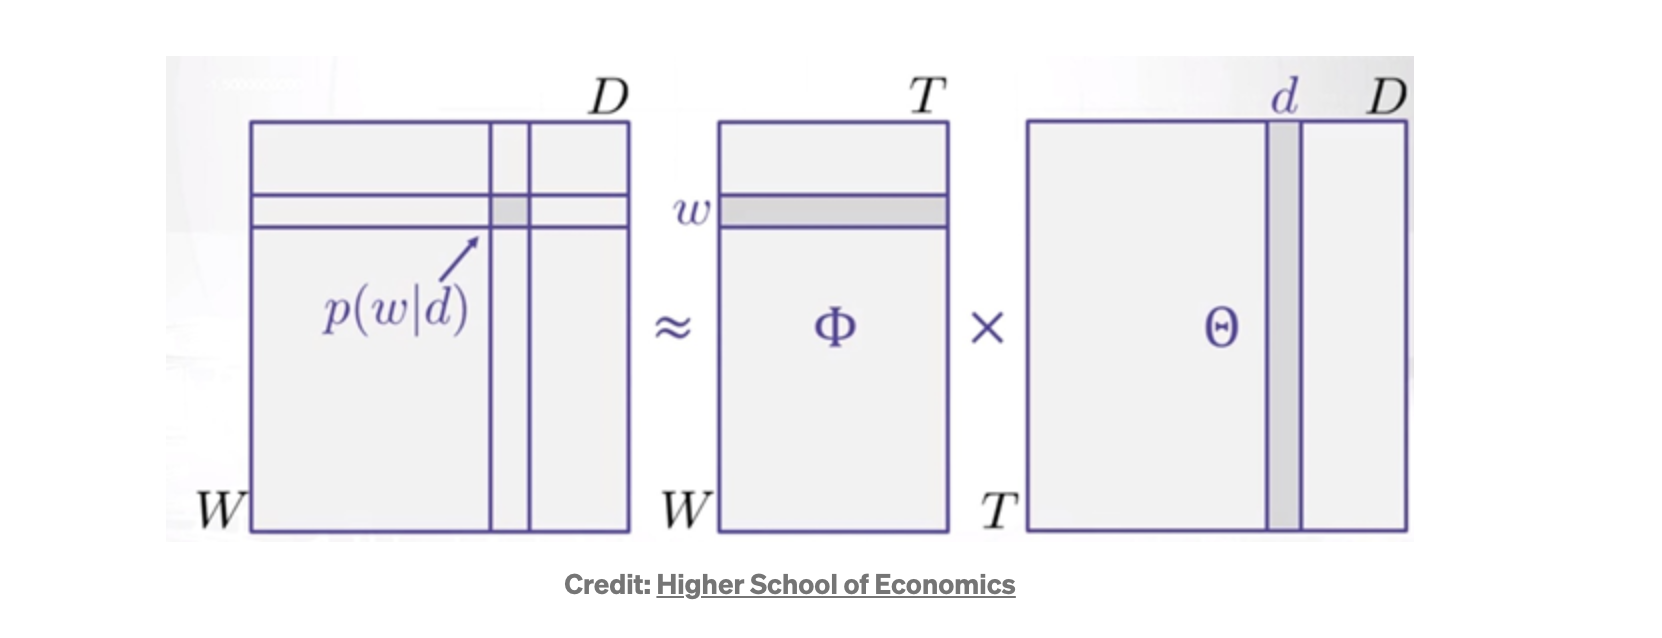

The goal of the approach is to learn these matrices

**Gensim** is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 13.3 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=22e8603d34d3388bc7626c6e9e780d314c4088188743f93b449475cbdb27d073
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [ ]:
len(newsgroups_train.data)

11314

In [ ]:
print(newsgroups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
#tfidf is used for propotionately allocating the topic to the model

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer(language='english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
from tqdm import tqdm

In [ ]:
articles = newsgroups_train.data
processed_docs=[]
for i in tqdm(range(len(articles))):
  processed_docs.append(preprocess(articles[i]))

100%|██████████| 11314/11314 [00:48<00:00, 235.37it/s]


In [ ]:
print(processed_docs[:2])

[['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst'], ['guykuo', 'carson', 'washington', 'subject', 'clock', 'poll', 'final', 'summari', 'final', 'clock', 'report', 'keyword', 'acceler', 'clock', 'upgrad', 'articl', 'shelley', 'qvfo', 'innc', 'organ', 'univers', 'washington', 'line', 'nntp', 'post', 'host', 'carson', 'washington', 'fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'rat', 'speed', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day',

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 addit
1 bodi
2 bricklin
3 bring
4 bumper
5 call
6 colleg
7 door
8 earli
9 engin
10 enlighten


In [ ]:
# keep 10000 most freq tokens. Remove freq below 15 and above 0.5*total
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

# Using Bag of Words

In [ ]:
# Use Gensim Bag of Words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[1]

[(24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 2),
 (33, 5),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 2),
 (39, 1),
 (40, 2),
 (41, 2),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 3),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 2),
 (62, 1),
 (63, 1),
 (64, 3),
 (65, 1),
 (66, 4)]

In [ ]:
document_num = 20
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 18 ("rest") appears 1 time.
Word 166 ("clear") appears 1 time.
Word 336 ("refer") appears 1 time.
Word 350 ("true") appears 1 time.
Word 391 ("technolog") appears 1 time.
Word 437 ("christian") appears 1 time.
Word 453 ("exampl") appears 1 time.
Word 476 ("jew") appears 1 time.
Word 480 ("lead") appears 1 time.
Word 482 ("littl") appears 3 time.
Word 520 ("wors") appears 2 time.
Word 721 ("keith") appears 3 time.
Word 732 ("punish") appears 1 time.
Word 803 ("california") appears 1 time.
Word 859 ("institut") appears 1 time.
Word 917 ("similar") appears 1 time.
Word 990 ("allan") appears 1 time.
Word 991 ("anti") appears 1 time.
Word 992 ("arriv") appears 1 time.
Word 993 ("austria") appears 1 time.
Word 994 ("caltech") appears 2 time.
Word 995 ("distinguish") appears 1 time.
Word 996 ("german") appears 1 time.
Word 997 ("germani") appears 3 time.
Word 998 ("hitler") appears 1 time.
Word 999 ("livesey") appears 2 time.
Word 1000 ("motto") appears 2 time.
Word 1001 ("order") appear

In [ ]:
# 2m # increasing number of passes shall definitely improve the model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=10, workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.008*"program" + 0.008*"avail" + 0.007*"data" + 0.007*"window" + 0.006*"server" + 0.006*"file" + 0.006*"user" + 0.006*"list" + 0.006*"chip" + 0.005*"softwar"
Topic: 1 
Words: 0.012*"armenian" + 0.011*"nasa" + 0.011*"space" + 0.007*"bike" + 0.007*"turkish" + 0.005*"ohio" + 0.005*"orbit" + 0.004*"center" + 0.004*"cleveland" + 0.004*"turk"
Topic: 2 
Words: 0.006*"israel" + 0.005*"isra" + 0.005*"jew" + 0.005*"game" + 0.004*"team" + 0.004*"arab" + 0.003*"jewish" + 0.003*"jesus" + 0.003*"play" + 0.003*"live"
Topic: 3 
Words: 0.011*"govern" + 0.005*"american" + 0.004*"public" + 0.004*"presid" + 0.004*"clinton" + 0.004*"weapon" + 0.004*"protect" + 0.004*"crime" + 0.004*"countri" + 0.003*"gun"
Topic: 4 
Words: 0.008*"wire" + 0.006*"engin" + 0.005*"space" + 0.004*"power" + 0.004*"build" + 0.004*"grind" + 0.004*"launch" + 0.004*"insur" + 0.004*"light" + 0.004*"water"
Topic: 5 
Words: 0.022*"window" + 0.021*"file" + 0.011*"program" + 0.010*"card" + 0.009*"driver" + 0.009*"imag" +

# Using Tf-idf

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

# instead of using bag of words, we send tf-idf as an input to the model

[(0, 0.1710625762591397),
 (1, 0.17368779842655097),
 (2, 0.155419489915073),
 (3, 0.2957445074316908),
 (4, 0.11836602497977548),
 (5, 0.15695023912113057),
 (6, 0.40285625492091776),
 (7, 0.174776788688058),
 (8, 0.12706156155902396),
 (9, 0.272611632455378),
 (10, 0.17017466234223827),
 (11, 0.1442824163480051),
 (12, 0.1846058258449959),
 (13, 0.24150470522322076),
 (14, 0.16783948753534583),
 (15, 0.29020607000815246),
 (16, 0.19136864594649777),
 (17, 0.15384172147015857),
 (18, 0.16526234485610986),
 (19, 0.1878756152537469),
 (20, 0.14980136010861542),
 (21, 0.21700814536427218),
 (22, 0.1996081806413184),
 (23, 0.1419842765585958)]


In [ ]:
# 1m 25s
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=10, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.007*"christian" + 0.005*"jesus" + 0.004*"bibl" + 0.004*"moral" + 0.003*"religion" + 0.003*"atheist" + 0.003*"church" + 0.003*"keith" + 0.003*"exist" + 0.003*"christ"
Topic: 1 Word: 0.005*"intercon" + 0.005*"team" + 0.005*"amanda" + 0.004*"jupit" + 0.004*"captain" + 0.004*"comet" + 0.004*"devil" + 0.004*"georgia" + 0.003*"psuvm" + 0.003*"utexa"
Topic: 2 Word: 0.006*"alaska" + 0.005*"kaldi" + 0.005*"engr" + 0.005*"hamburg" + 0.005*"higgin" + 0.004*"sdsu" + 0.004*"bontchev" + 0.004*"clarkson" + 0.004*"fnal" + 0.004*"informatik"
Topic: 3 Word: 0.004*"encrypt" + 0.003*"clipper" + 0.003*"chip" + 0.003*"govern" + 0.003*"pitt" + 0.002*"netcom" + 0.002*"bank" + 0.002*"clinton" + 0.002*"secur" + 0.002*"gordon"
Topic: 4 Word: 0.006*"window" + 0.004*"file" + 0.004*"card" + 0.003*"drive" + 0.003*"driver" + 0.003*"program" + 0.003*"graphic" + 0.003*"softwar" + 0.002*"disk" + 0.002*"video"
Topic: 5 Word: 0.009*"stratus" + 0.007*"udel" + 0.007*"ohio" + 0.007*"jaeger" + 0.006*"salmon" 

# Testing

In [ ]:
unseen_document = ''
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5772048234939575	 Topic: 0.023*"death" + 0.022*"probe" + 0.018*"rise" + 0.017*"continu" + 0.017*"polic"
Score: 0.26278024911880493	 Topic: 0.051*"govt" + 0.028*"plan" + 0.023*"fund" + 0.019*"urg" + 0.018*"council"
Score: 0.020003829151391983	 Topic: 0.061*"polic" + 0.043*"kill" + 0.025*"attack" + 0.017*"investig" + 0.017*"iraq"
Score: 0.020002495497465134	 Topic: 0.021*"talk" + 0.018*"dead" + 0.014*"north" + 0.014*"question" + 0.013*"leav"
Score: 0.020001934841275215	 Topic: 0.020*"council" + 0.015*"plan" + 0.015*"mayor" + 0.015*"support" + 0.012*"hop"
Score: 0.02000165358185768	 Topic: 0.028*"report" + 0.019*"strike" + 0.017*"warn" + 0.014*"drug" + 0.012*"time"
Score: 0.020001377910375595	 Topic: 0.045*"charg" + 0.040*"court" + 0.036*"face" + 0.022*"murder" + 0.017*"case"
Score: 0.020001336932182312	 Topic: 0.027*"water" + 0.019*"miss" + 0.017*"industri" + 0.017*"public" + 0.011*"spark"
Score: 0.020001189783215523	 Topic: 0.019*"lead" + 0.015*"prison" + 0.014*"final" + 0.014*

# Visualization

In [ ]:

import pickle 
import pyLDAvis
import pyLDAvis.gensim
import os
# Visualize the topics
pyLDAvis.enable_notebook()
num_topics=8
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
# topics in terms of sizes
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.091726 -0.023662       1        1  15.582151
2      0.123770 -0.000993       2        1  14.972259
6     -0.111124  0.094258       3        1  14.880809
7      0.135475 -0.152394       4        1  13.532367
0     -0.136686 -0.075499       5        1  13.092895
1      0.077684  0.108693       6        1  10.153955
5     -0.198009 -0.064127       7        1   9.304688
4      0.017165  0.113724       8        1   8.480875, topic_info=           Term         Freq        Total Category  logprob  loglift
988      window  3042.000000  3042.000000  Default  30.0000  30.0000
284        file  2953.000000  2953.000000  Default  29.0000  29.0000
437   christian  1998.000000  1998.000000  Default  28.0000  28.0000
313       drive  2492.000000  2492.000000  Default  27.0000  27.0000
1772   armenian  1248.000000  1248.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
683        high   271.428495  1497.960574   Topic8  -5.7574   0.7592
300        appl   226.924036   888.319651   Topic8  -5.9365   1.1026
624       place   242.700289  1446.518591   Topic8  -5.8693   0.6823
556     current   223.377065  1257.246387   Topic8  -5.9522   0.7395
149      requir   215.327914  1232.721840   Topic8  -5.9889   0.7225

[627 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
299       1  0.133595   accept
299       2  0.145558   accept
299       3  0.032900   accept
299       4  0.466584   accept
299       5  0.129607   accept
...     ...       ...      ...
5128      2  0.977428  zionist
5128      6  0.012373  zionist
3142      5  0.011621   zoolog
3142      8  0.976181   zoolog
1845      6  0.991026     zuma

[2115 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 7, 8, 1, 2, 6, 5])

Assumptions made by LDA:
Each document is just a collection of words or a “bag of words”. Thus, the order of the words and the grammatical role of the words (subject, object, verbs, …) are not considered in the model.
Words like am/is/are/of/a/the/but/… don’t carry any information about the “topics” and therefore can be eliminated from the documents as a preprocessing step. In fact, we can eliminate words that occur in at least %80 ~ %90 of the documents, without losing any information.
For example, if our corpus contains only medical documents, words like human, body, health, etc might be present in most of the documents and hence can be removed as they don’t add any specific information which would make the document stand out.
We know beforehand how many topics we want. ‘k’ is pre-decided.
All topic assignments except for the current word in question are correct, and then updating the assignment of the current word using our model of how documents are generated

In [ ]:
# some dataset links for topic modeling in social media dataset
# https://medium.com/aryma-labs/learn-how-we-used-topic-modeling-to-help-a-client-find-hostile-topics-among-various-social-media-de6a6003709f
# https://lazarinastoy.com/topic-modelling-limitations-short-text/
# https://www.kaggle.com/search?q=social+media
# https://www.kaggle.com/eliasdabbas/extract-entities-from-social-media-posts/data